In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
# Abre archivo FIT y obtiene las cabeceras para modificacion
hdus = fits.open("modificar.fits", mode='update')

# Obtiene la cabecera primaria
cabecera = hdus[0].header

# Obtiene de la cabecera el nombre del objeto y las posiciones
objeto = cabecera['OBJECT']

print 'OBJETO: '+ str(cabecera['OBJECT'])
print 'RA: '+ str(cabecera['RA'])
print 'DEC: '+ str(cabecera['DEC'])

# Obtiene la coordenada objeto desde CDS 
coordenada = SkyCoord.from_name(objeto)

cabecera['RA'] = coordenada.ra.degree
cabecera['DEC'] = coordenada.dec.degree

# Actualiza el archivo
hdus.flush()
hdus.close()


OBJETO: hd165052
RA: 271.293961154
DEC: -24.398570191


In [2]:
from astropy.io import fits

# Abre archivo FIT y obtiene las cabeceras
#hdus = fits.open('/home/spedrosa/Projects/Eagle/new_fits/galedge_2.fits')
hdus = fits.open('/home/susana/Projects/Eagle/Morphology/illustris/broadband_132699.fits')
#hdus = fits.open('/home/supe/Projects/Python/Morphology/modificar.fits')

f = hdus
cube = f[0].data
header = f[0].header
f.close()

# Imprime las HDU (Header Data Units) del archivo
hdus.info()

# Obtiene la cabecera primaria
cabecera = hdus[0].header
print cabecera

# Obtiene de la cabecera el nombre del objeto y las posiciones
#print 'cpx en pix: ',cabecera['CRPIX1']
#print 'cpy en pix: ',cabecera['CRPIX2']
#print 'deltax en pc: ',cabecera['CDELT1']
#print 'deltay en pc: ',cabecera['CDELT2']

#plt.imshow(hdus, cmap='gray')
#plt.colorbar()

hdus.close()



Filename: /home/susana/Projects/Eagle/Morphology/illustris/broadband_132699.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      19   ()              
1    BROADBAND   BinTableHDU     22   0R x 0C      []   
2    CAMERA0-PARAMETERS  ImageHDU        33   (256, 256)   float32   
3    CAMERA1-PARAMETERS  ImageHDU        33   (256, 256)   float32   
4    CAMERA2-PARAMETERS  ImageHDU        33   (256, 256)   float32   
5    CAMERA3-PARAMETERS  ImageHDU        33   (256, 256)   float32   
6    GADGET      BinTableHDU    155   0R x 0C      []   
7    INTEGRATED_QUANTITIES  BinTableHDU     59   265R x 12C   [D, D, D, D, D, D, D, D, D, D, D, D]   
8    MAKEGRID    BinTableHDU     18   0R x 0C      []   
9    MCRX        BinTableHDU     67   0R x 0C      []   
10   SCATTERING_LAMBDAS  BinTableHDU     30   0R x 5C      [J, D, L, D, J]   
11   SFRHIST     BinTableHDU     63   0R x 0C      []   
12   STELLARMODEL  BinTableHDU     60   0R x 0C      []   
13

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def listsum(numList):
    theSum = 0
    for i in numList:
        theSum = theSum + i
    return theSum

#image = fits.getdata("niriH.fits")
#image = fits.getdata('/home/spedrosa/Projects/Eagle/fits_illus/broadband_132699.fits')
#print image.shape

#full_fit_path = os.path.join(fits_path, fit)
    #print full_fit_path
    # read datacube
f = pf.open(image)
cube = f[15].data
header = f[15].header
f.close()

#I_mean = np.mean(image)

#print I_mean

#print(listsum(image))

#for i in image.shape

plt.imshow(image, cmap='gray')
#plt.show(image_data)
plt.colorbar()

ValueError: data-type with unspecified variable length

In [17]:
# Import necessary modules
import pyfits as pf
import matplotlib.pyplot as plt
from astropy.io import fits
import math
import os

#XXXXXXXXXXX CAJA chica XXXXXXXXXXXXX

f1 = open('Gini_M20_small.dat', 'wt')

fits_path = '/home/supe/Projects/Python/Eagle/fits_rand/' 
fits = os.listdir(fits_path) 

for fit in fits:
    mylist = fit.split("_")
    fit_sub_group = int( mylist[3])
    fit_group = int( mylist[2])

    full_fit_path = os.path.join(fits_path, fit)
    #print full_fit_path
    # read datacube
    f = pf.open(full_fit_path)
    cube = f[0].data
    header = f[0].header
    f.close()

    dim = 400
    dim2 = 200
    xc_p = 200 #en pixeles
    yc_p = 200 #en pixeles
    delta_x = 150  #pc
    delta_y = 150  #pc 
    xc = xc_p * delta_x  #pc
    yc = yc_p * delta_y  #pc

    #for i in range(0,293): 
    #Le cambio el rango para solo tomar las longitudes de onda de la banda r
    image_tot = np.zeros((dim,dim))
    for i in range(60,120):    
       cube_slice = i
       image = cube[cube_slice, :, :] 
       image_tot = image_tot + image 

    #Calculate M20
    x_pos = np.zeros(dim)
    y_pos = np.zeros(dim)
    for i in range(dim):
       x_pos[i] = delta_x * (i + 0.5)  #pc
       y_pos[i] = delta_y * (i + 0.5)  #pc
       
    Delta = np.zeros(dim * dim)
    x_pos2 = np.zeros(dim * dim)
    y_pos2 = np.zeros(dim * dim)
    image_vector = np.zeros(dim * dim)
    for i in range(dim):
        for j in range(dim):
            image_vector [dim  * i + j] = image_tot[i][j]
            x_pos2 [dim  * i + j] = x_pos[i]
            y_pos2 [dim * i + j] = y_pos[j]
            Delta [dim  * i + j] = ((x_pos[i]-xc)**2 + (y_pos[j]-yc)**2)
       

    index = np.where((x_pos2 >= 20000) & (x_pos2 <= 80000) & (y_pos2 >= 20000) & (y_pos2 <= 80000)) #Solo el cuadrado central
    Delta2 = Delta[index]
    image_vector2 = image_vector[index]
    
    #nuevo largo de estos arrays: len(Delta2) y no dim2*dim2 porque no queda exacto igual
    print len(Delta2)
    dim_cut = len(Delta2)    
    M_tot = 0
    #for i in range(dim2 * dim2):
    for i in range(dim_cut):
        M_tot = M_tot + image_vector2 [i] * Delta2 [i]
        
    #Calculo la intensidad total
    I_tot = np.sum(image_vector2)
    #Calculo la intensidad media
    I_mean_abs =np.sum(abs(image_vector2))/float(len(image_vector2))
       
    #Tiene que ordenar de menor a mayor la intensidad y a Delta con el mismo orden
    ord = np.argsort(image_vector2)
    image_vector_ord = image_vector2[ord]
    Delta_ord = Delta2[ord]

    sum_I = 0
    sum_Mi = 0
    #i = dim2*dim2 - 1
    i = (dim_cut) - 1
    while (sum_I < 0.2 * I_tot):
        sum_Mi = sum_Mi + image_vector_ord[i] * Delta_ord[i]
        sum_I = sum_I + image_vector_ord[i]
        i = i - 1
    
    M20 = math.log10(sum_Mi / M_tot)

    Gini = 0
    #for i in range(dim2 * dim2):
    for i in range(dim_cut):        
        #Gini = Gini + ((2 * i - (dim2 * dim2) -1) * abs(image_vector_ord[i]))
        Gini = Gini + ((2 * i - (dim_cut) -1) * abs(image_vector_ord[i]))
        #Gini = Gini + ((2 * i - (dim * dim) -1) * abs(image_vector[i]))
        
    
    Gini = Gini / (I_mean_abs * (dim_cut) * ((dim_cut)-1))
    #print 'Gini M20'
    #print Gini,M20
    salida = ",".join([str(Gini),str(M20),'\n'])
    f1.write(salida)
    
f1.close()

with open('Gini_M20_obs1.dat', 'r') as Gfileobs:
    #read_titles = Gfileobs.readline()
    for line in Gfileobs:
        mylist = line.split(",")
        Gini_obs = float(mylist[0])
        M20_obs = float(mylist[1])

plt.scatter(M20,Gini, marker ='.', color='black')
plt.scatter(M20_obs,Gini_obs, marker ='.', color='red') 
plt.xlabel('M20') 
plt.ylabel('Gini') 
plt.xlim(0, -3)
plt.ylim(0, 1)
plt.loglog()
plt.show() 

OSError: [Errno 2] No such file or directory: '/home/supe/Projects/Python/Morphology/fits/'

In [29]:
# Import necessary modules
import pyfits as pf
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math
import os

#Para leer Illustris
#f1 = open('Gini_M20_illus.dat', 'wt')
#image = fits.getdata('/home/spedrosa/Projects/Eagle/fits_illus/broadband_132699.fits')
#fits_path = '/home/spedrosa/Projects/Eagle/fits_illus/' 
#fits = os.listdir(fits_path) 
#hdus = fits.open('/home/spedrosa/Projects/Eagle/fits_illus/broadband_132699.fits')
#hdus = fits.open('/home/supe/Projects/Python/Morphology/modificar.fits')
#f = hdus
#cube = f[15].data
#header = f[15].header
#f.close()

#Para leer Eagle
f1 = open('Gini_M20_rand_cut.dat', 'wt')
#fits_path = '/home/spedrosa/Projects/Eagle/fits_rand/' 
fits_path = '/media/susana/a5a0f7f3-68c2-4f6d-b49f-74444493a37f/Eagle/fits/fits_rand'
fits = os.listdir(fits_path) 

for fit in fits:
    mylist = fit.split("_")
    mylist1 = mylist[1]
    mylist2 = mylist1.split(".")
    fit_haloid = int( mylist2[0])
    
    full_fit_path = os.path.join(fits_path, fit)
    #print full_fit_path
    # read datacube
    f = pf.open(full_fit_path)
    #Illustris
    #cube = f[15].data
    #header = f[15].header
    #Eagle
    cube = f[0].data
    header = f[0].header
    f.close()
        
    dim = 256
    xc_p = header['CRPIX1'] #en pixeles
    yc_p = header['CRPIX2'] #en pixeles
    delta_x = header['CDELT1']  #pc
    delta_y = header['CDELT2']  #pc 
    xc = xc_p * delta_x  #pc
    yc = yc_p * delta_y  #pc
    
    #Para leer illustris
    #dim = 256
    #xc_p = 128.5 #en pixeles
    #yc_p = 128.5 #en pixeles
    #delta_x = 235.5 #pc
    #delta_y = 235.2  #pc 
    #xc = xc_p * delta_x  #pc
    #yc = yc_p * delta_y  #pc

    #for i in range(0,293): 
    #Le cambio el rango para solo tomar las longitudes de onda de la banda r
    #Cambio de formato de los fits: ahora hay 10 slices en z que contienen las bandas u,g,r,i,z,u',g',r',i',z'
    #los prima son a z=0.1
    image_tot = np.zeros((dim,dim))
    #for i in range(60,120):    
    #for i in range(10,290):   #prueba para ver si dependia del delta de lambda 
       #cube_slice = i
       #image = cube[cube_slice, :, :] 
       #image_tot = image_tot + image 

    cube_slice = 7 #elijo la banda: u,g,r,i,z a z=0, u',g',r',i',z' a z=0.1
    image_tot = cube[cube_slice,:,:]
 
    
    #Calculate M20
    x_pos = np.zeros(dim)
    y_pos = np.zeros(dim)
    for i in range(dim):
       x_pos[i] = delta_x * (i + 0.5)  #pc
       y_pos[i] = delta_y * (i + 0.5)  #pc
        
    Delta = np.zeros(dim * dim)
    image_vector = np.zeros(dim * dim)
    M_tot = 0
    for i in range(dim):
        for j in range(dim):
            cont = dim * i +j
            image_vector [dim  * i + j] = image_tot[i][j]
            Delta [dim  * i + j] = ((x_pos[i]-xc)**2 + (y_pos[j]-yc)**2)
            M_tot = M_tot + image_vector [dim  * i + j] * Delta [dim  * i + j]
    
    #magnitude cut ---> James --> 5.545e-6
    index = np.where(image_vector > 5.545e-6) 
    image_vector = image_vector[index]
    Delta = Delta[index]   
    dim2 = len(image_vector)
        
    #Calculo la intensidad total
    I_tot = np.sum(image_vector)
    #Calculo la intensidad media
    I_mean_abs =np.sum(abs(image_vector))/float(len(image_vector))
       
    #Tiene que ordenar de menor a mayor la intensidad y a Delta con el mismo orden
    ord = np.argsort(image_vector)
    image_vector_ord = image_vector[ord]
    Delta_ord = Delta[ord]

    sum_I = 0
    sum_Mi = 0
    #i = dim*dim - 1
    i = dim2 - 1
    while (sum_I < 0.2 * I_tot):
        sum_Mi = sum_Mi + image_vector_ord[i] * Delta_ord[i]
        sum_I = sum_I + image_vector_ord[i]
        i = i - 1
    
    M20 = math.log10(sum_Mi / M_tot)

    Gini = 0
    #for i in range(dim * dim):
    for i in range(dim2):        
        #Gini = Gini + ((2 * i - (dim * dim) -1) * abs(image_vector_ord[i]))
        Gini = Gini + ((2 * i - (dim2) -1) * abs(image_vector_ord[i]))
    
    #Gini = Gini / (I_mean_abs * (dim*dim) * ((dim*dim)-1))
    Gini = Gini / (I_mean_abs * (dim2) * ((dim2)-1))
    #print 'Gini M20'
    #print Gini,M20

    #salida = ",".join([str(Gini),str(M20),mylist2[0],'\n'])
    salida = ",".join([str(Gini),str(M20),'\n'])
    f1.write(salida)
    
f1.close()

with open('Gini_M20_obs1.dat', 'r') as Gfileobs:
    #read_titles = Gfileobs.readline()
    for line in Gfileobs:
        mylist = line.split(",")
        Gini_obs = float(mylist[0])
        M20_obs = float(mylist[1])

#plt.scatter(M20,Gini, marker ='.', color='black')
#plt.scatter(M20_obs,Gini_obs, marker ='.', color='red') 
#plt.xlabel('M20') 
#plt.ylabel('Gini') 
#plt.xlim(0, -3)
#plt.ylim(0, 1)
#plt.loglog()
#plt.show() 

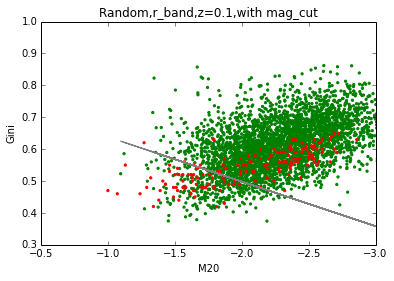

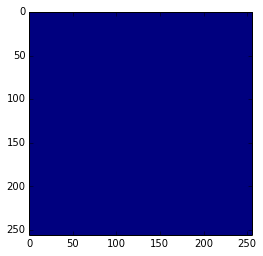

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import ascii 
import csv
import sys

gini_face = np.zeros(3460)
m20_face = np.zeros(3460)
gini_rand = np.zeros(3460)
m20_rand = np.zeros(3460)
gini_randi = np.zeros(3460)
m20_randi = np.zeros(3460)
gini_randipri = np.zeros(3460)
m20_randipri = np.zeros(3460)

#i=0
#with open('Gini_M20_face.dat', 'r') as Gf:
#    for line in Gf:
#        mylist = line.split(",")
#        gini_face[i] = mylist[0]
#        m20_face[i] = mylist[1]
#        i = i +1
#Gf.close()

i=0
with open('Gini_M20_rand_cut.dat', 'r') as Gf:
    for line in Gf:
        mylist = line.split(",")
        gini_rand[i] = mylist[0]
        m20_rand[i] = mylist[1]
        i = i +1
Gf.close()
F = 5 * (-0.7783 - 0.14 * m20_rand + gini_rand)/1.00975

#i=0
#with open('Gini_M20_rand_i.dat', 'r') as Gf2:
#    for line in Gf2:
#        mylist = line.split(",")
#        gini_randi[i] = mylist[0]
#        m20_randi[i] = mylist[1]
#        i = i +1
#Gf2.close()

#i=0
#with open('Gini_M20_face_prueba.dat', 'r') as Gf:
#    for line in Gf:
#        mylist = line.split(",")
#        gini_randipri[i] = mylist[0]
#        m20_randipri[i] = mylist[1]
#        i = i +1
#Gf.close()

gini_obs1 = np.zeros(160)
m20_obs1 = np.zeros(160)
i=0
with open('Gini_M20_obs1.dat', 'r') as Gf1:
    for line in Gf1:
        mylist = line.split(",")
        gini_obs1[i] = float(mylist[0])
        m20_obs1[i] = float(mylist[1])
        i = i + 1

#gini_obs3 = np.zeros(32)
#m20_obs3 = np.zeros(32)
#i=0
#with open('Gini_M20_obs3.dat', 'r') as Gf3:
#    for line in Gf3:
#        mylist = line.split(",")
#        gini_obs3[i] = float(mylist[0])
#        m20_obs3[i] = float(mylist[1])
#        i = i + 1
        
        
#plt.scatter(m20_face,gini_face, marker ='.', color='blue')
#plt.scatter(m20_rand,gini_rand, marker ='.', color='black')
plt.scatter(m20_rand,gini_rand, marker ='.', color='green')
plt.scatter(m20_obs1,gini_obs1, marker ='.', color='red') 
#plt.plot(m20_obs1,0.7783 + 0.14 * m20_obs1, '-', color='black')
plt.plot(m20_rand,0.7783 + 0.14 * m20_rand, '-', color='grey')
d = 5* abs(-0.14*m20_obs1 + gini_obs1 - 0.778)/1.009
#plt.plot(m20_obs1,-0.14*m20_obs1 + (0.7783/d), '-', color='black')
#plt.plot(m20_obs1,0.3-0.15*m20_obs1, '-', color='black')
#plt.scatter(m20_obs2,gini_obs2, marker ='.', color='red') 
plt.title('Random,r_band,z=0.1,with mag_cut')
plt.xlabel('M20') 
plt.ylabel('Gini') 
plt.xlim(-0.5, -3)
plt.ylim(0.3, 1)
#plt.loglog()
plt.show() 
# display the sum image
fig, ax = plt.subplots()
alplot = ax.imshow(image_tot, vmin = 0, vmax = 300)
#alplot.set_cmap('gray')

#define axes
#ax.set_xlabel('x pixels')
#ax.set_ylabel('y pixels')
#ax.set_ylim([0, tam[0]-1])
#ax.set_xlim([0, tam[1]-1])

#plt.imshow(image_tot, cmap='gray')
#fig.savefig('gini_m20.pdf')


#H, xedges, yedges = np.histogram2d(gini,m20, bins=10, range=[[-3,0], [0.3,0.7]])
#H, xedges, yedges = np.histogram2d(gini_obs1,m20_obs1, bins=50, range=[[-0.7,-0.3], [0,3]])
#plt.pcolor(xedges,yedges,H.transpose(),cmap='spectral' ) 
#cbar = plt.colorbar()

In [9]:
from astropy.io import fits
import numpy as np
# Primero creo un HDU object
hdu = fits.PrimaryHDU()

# Lo lleno con random
#hdu.data = np.random.random((256,256))
# Lo lleno con 1
hdu.data = np.ones((256, 256))

# Obtiene la cabecera primaria
#cabecera = hdu[0].header

hdu.writeto('wht1.fits', clobber=True)

#image = fits.getdata("niriH.fits")
image = fits.getdata('/home/spedrosa/Projects/Eagle/fits_illus/broadband_132699.fits')
#print image.shape

#full_fit_path = os.path.join(fits_path, fit)
    #print full_fit_path
    # read datacube
f = pf.open(image)
cube = f[15].data
header = f[15].header
f.close()

#I_mean = np.mean(image)

#print I_mean

#print(listsum(image))

#for i in image.shape

plt.imshow(image, cmap='gray')
#plt.show(image_data)
plt.colorbar()